# Visualization

A picture is worth a thousand words.

## Recap

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
penguins = sns.load_dataset('penguins')

# If the code above gives you an error,
# comment it and uncomment the one below.
#
# penguins = pd.read_csv('../data/penguins.csv')

__Ex__: Count how many penguins are per island.

<AxesSubplot:xlabel='island', ylabel='count'>

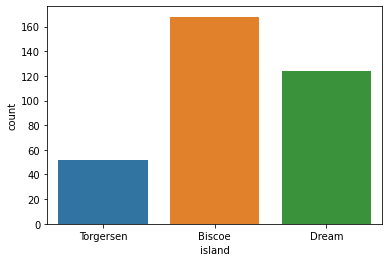

In [3]:
sns.countplot(x=penguins.island)

__Ex__: Count how many penguins are of each species, and separate them by sex.

<AxesSubplot:xlabel='species', ylabel='count'>

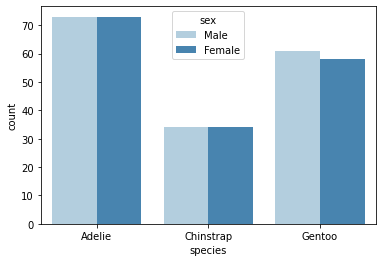

In [4]:
sns.countplot(x=penguins.species,
              hue=penguins.sex,
              palette="Blues")

__Ex__: Compute a histogram of the penguins' bodymass 

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

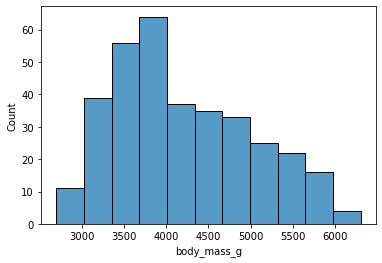

In [5]:
sns.histplot(x=penguins.body_mass_g)

__Ex__: Plot a histogram of the penguins' body massses separating different islands.

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

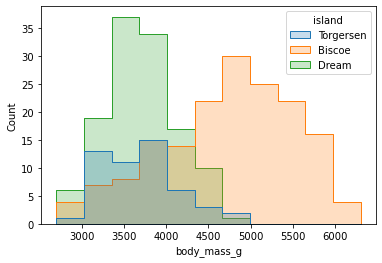

In [6]:
sns.histplot(x=penguins.body_mass_g,
             #y=penguins.bill_depth_mm,
             hue=penguins.island,
             element='step')

__Ex__: Compute a scatter plot of the body mass against the flipper lenght, separating by species.

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

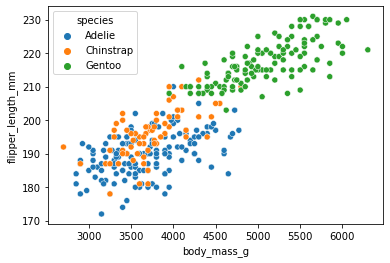

In [7]:
sns.scatterplot(x="body_mass_g",
                y="flipper_length_mm",
                hue="species",
                data=penguins)

__Ex__: Do you know a plot where you join scatter plots and histogram plots?

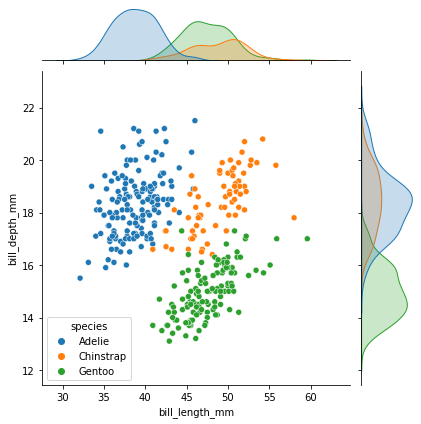

In [8]:
sns.jointplot(data=penguins,
              x="bill_length_mm",
              y="bill_depth_mm",
              hue="species")

__Ex__: Plot a box plot where the penguins' species are on the y-axis and the bill_depth is on the x-axis.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

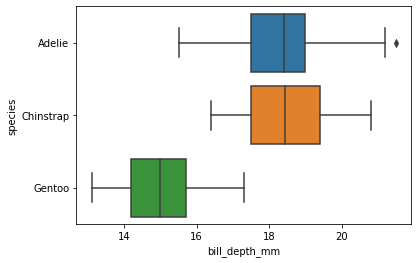

In [9]:
sns.boxplot(x=penguins.bill_depth_mm,
            y=penguins.species)

## Object hierarchy

One important big-picture matplotlib concept is its object hierarchy.

A `Figure` object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. **BUT**: Axes = Plot.

You can think of the `Figure` object as a box-like container holding one or more Axes=Plot. Below the Axes, in the hierarchy, are smaller objects such as individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels.

![Matplotlib hierarchy](../data/fig_map.webp)

## Subplots by hand

The most basic method of creating an axes is to use the `plt.axes` function. 

By default this creates a standard axes object that fills the entire figure. 

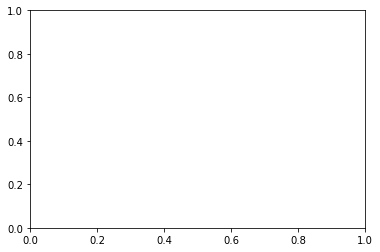

In [10]:
ax1 = plt.axes()

In [11]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

`plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

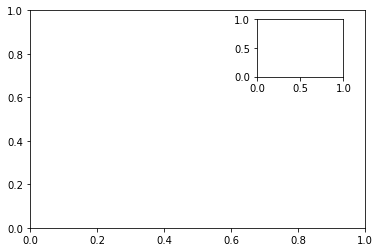

In [12]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

But we saw that a figure contains axes. Where's our figure?

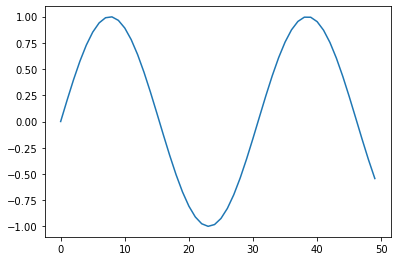

In [13]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])#, ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))

But remember, figures can have more than one axes!

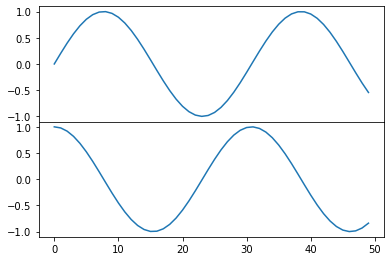

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4])#, xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])#, ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Wow! Nice! But, can I be lazy?

## The whole grid in one go!

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

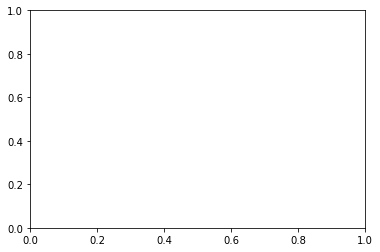

In [15]:
plt.subplots()

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


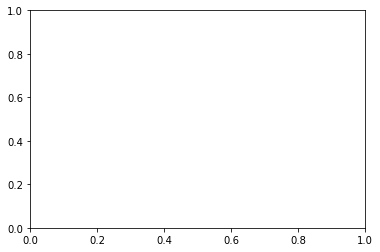

In [16]:
fig, ax = plt.subplots()
print( type(fig) )
print( type(ax) )

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

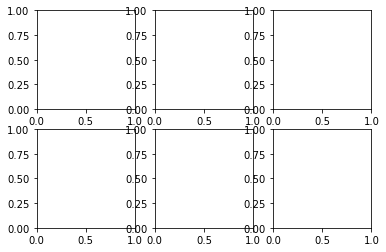

In [17]:
plt.subplots(nrows=2, ncols=3)#, sharex='col', sharey='row')

## Understanding `plt.subplots()`

The prescribed way to create a Figure with a single Axes under the OO approach is (not too intuitively) with plt.subplots(). This is really the only time that the OO approach uses pyplot, to create a Figure and Axes:

AttributeError: 'Figure' object has no attribute 'plot'

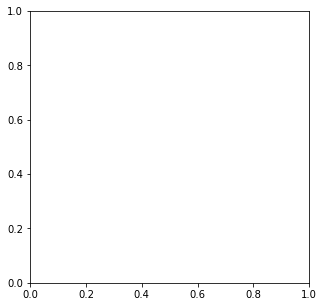

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
fig.plot([1,2,3])

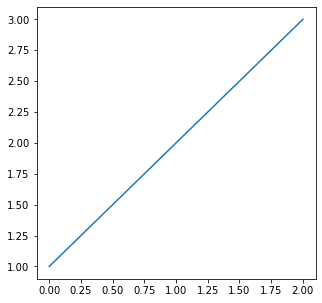

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot([1,2,3])

## Practical example

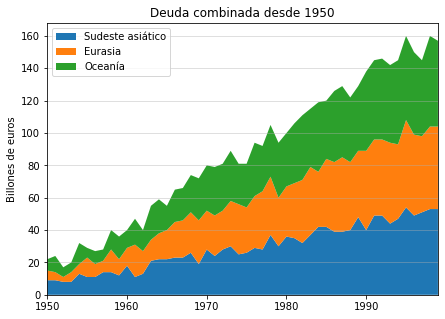

In [22]:
# Data
deuda = np.random.randint(0, 10, size=(3, 50)) + np.arange(50)
años = 1950 + np.arange(50)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax.stackplot(años, deuda,
             labels=['Sudeste asiático', 'Eurasia', 'Oceanía'])
ax.set_title('Deuda combinada desde 1950')
ax.legend(loc='upper left')
ax.set_ylabel('Billones de euros')
ax.set_xlim(xmin=años[0], xmax=años[-1])
ax.grid(axis='y', alpha=0.5)

# We call methods of ax directly to create a stacked-area
# chart and to add a legend, title, and y-axis label.
# Under the object-oriented approach, it’s clear that all
# of these are attributes of ax.

Okay, so how about more than one plot?

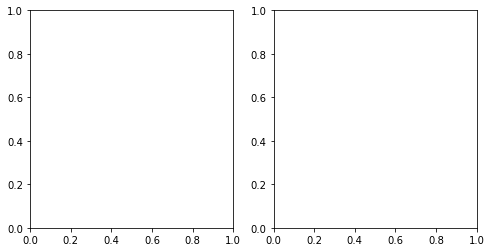

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

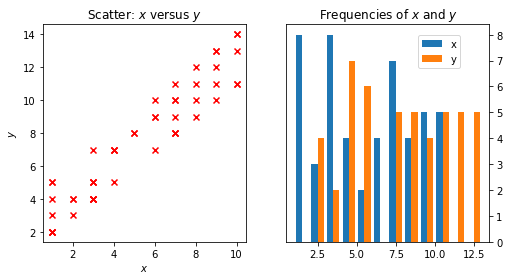

In [24]:
# Data
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='x', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

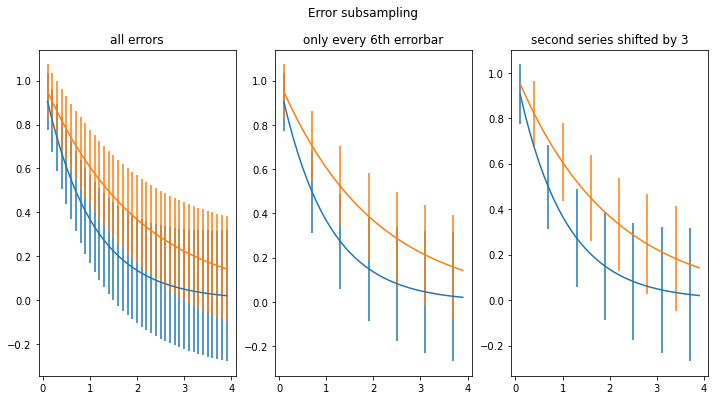

In [25]:
# Data
meses = np.arange(0.1, 4, 0.1)
usoCoche = np.exp(-1.0 * meses)
usoMoto = np.exp(-0.5 * meses)

# Error bar values
y1err = 0.1 + 0.1 * np.sqrt(meses)
y2err = 0.1 + 0.1 * np.sqrt(meses/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12, 6))

ax0.set_title('all errors')
ax0.errorbar(meses, usoCoche, yerr=y1err)
ax0.errorbar(meses, usoMoto, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(meses, usoCoche, yerr=y1err, errorevery=6)
ax1.errorbar(meses, usoMoto, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(meses, usoCoche, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(meses, usoMoto, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Error subsampling')
plt.show()

## More complex figures

First, and __Ex__:

Now, we want a figure with 2 rows and 3 columns.

Text(0.5, 1.0, 'marker: (5, 2)')

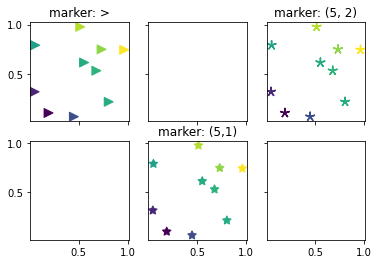

In [27]:
# Data
x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

# marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker: >")

# marker from TeX
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5,1))
axs[1, 1].set_title("marker: (5,1)")

# marker from path
axs[0, 2].scatter(x, y, s=80, c=z, marker=(5,2))
axs[0, 2].set_title("marker: (5, 2)")


In [28]:
# Data
houses = np.loadtxt('../data/cal_housing.data', delimiter=',')
y = houses[:, -1]
pop, age = houses[:, [4,7]].T

In [29]:
# First, we create this:
#
##############################
#             #              #
#             #              #
##############################
#             #              #
#             #              #
##############################
#             #              #
#             #              #
##############################


# To later transform it in:
#
##############################
#             #              #
#             #              #
#             #              #
#             #              #
##############################
#             #              #
#             #              #
##############################

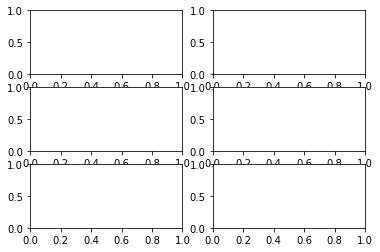

In [30]:
fig, axs = plt.subplots(3, 2)

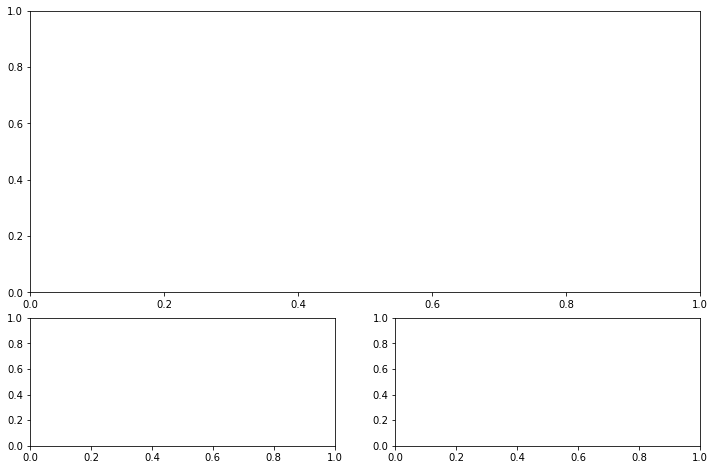

In [31]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

Text(0.5, 0, 'area population (log scl.)')

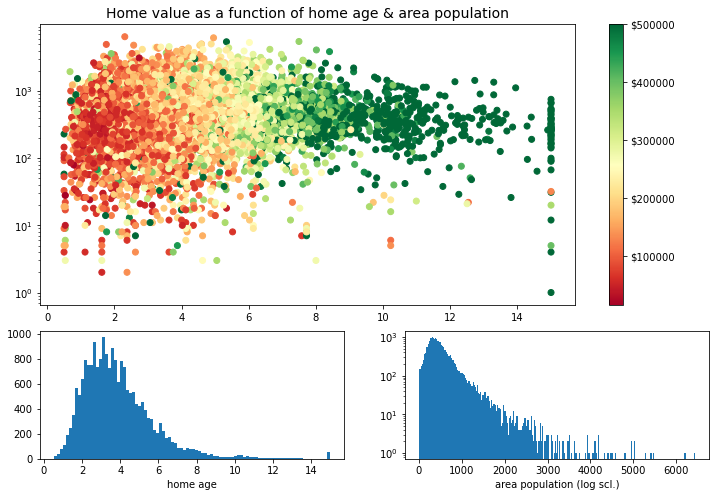

In [32]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True);

ax2.set_xlabel('home age')
ax3.set_xlabel('area population (log scl.)')

Text(0.5, 0, 'Histogram: area population (log scl.)')

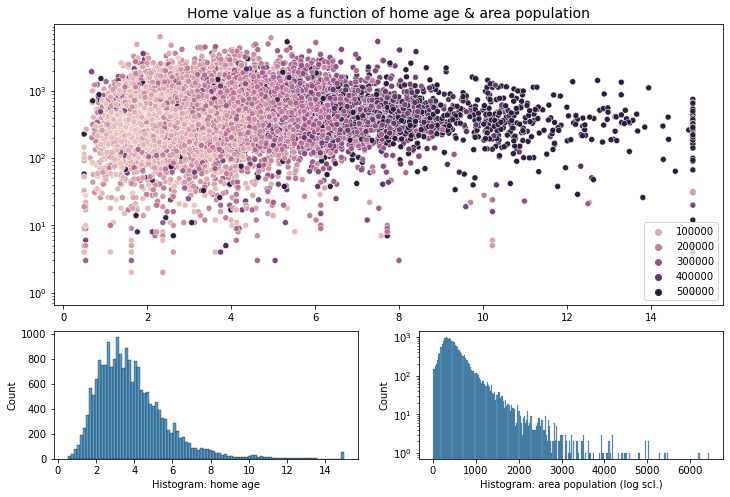

In [33]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
ax1.set_yscale('log')
sctr = sns.scatterplot(x=age, y=pop, hue=y, ax=ax1)
sns.histplot(x=age, ax=ax2)
sns.histplot(x=pop, ax=ax3)
ax3.set(yscale="log")

ax2.set_xlabel('Histogram: home age')
ax3.set_xlabel('Histogram: area population (log scl.)')

## Even more complicated arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, `plt.GridSpec()` is the best tool. The plt.GridSpec() object does not create a plot by itself; it is simply a convenient interface that is recognized by the `plt.subplot()` command.

In [34]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

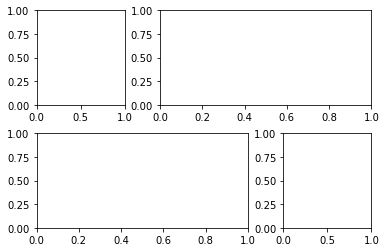

In [35]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

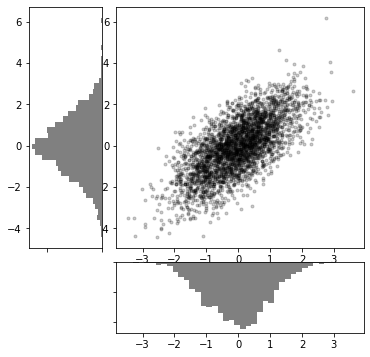

In [36]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## How to choose the correct plot

Back to your penguins...

In [37]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

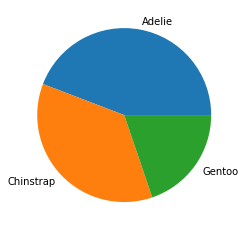

In [38]:
counts = [152, 124, 68]
labels = ['Adelie', 'Chinstrap', 'Gentoo']

plt.pie(counts, labels=labels);

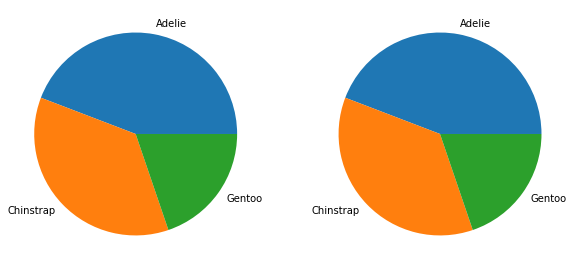

In [39]:
counts = np.array( [152, 124, 68] )
counts2 = counts * 10
labels = ['Adelie', 'Chinstrap', 'Gentoo']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.pie(counts, labels=labels);

ax2.pie(counts2, labels=labels);

Could this be improved? Well, a little:

<AxesSubplot:xlabel='species', ylabel='count'>

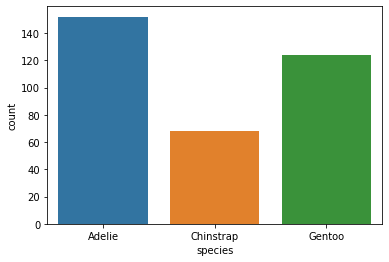

In [40]:
sns.countplot(x=penguins.species)

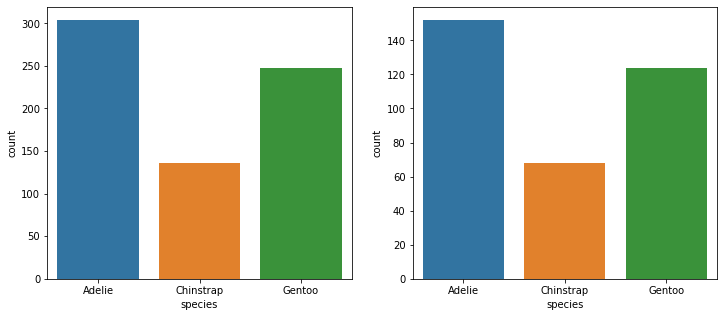

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=penguins.species.append(penguins.species), ax=ax1);
sns.countplot(x=penguins.species, ax=ax2);

In [42]:
data_url="https://bit.ly/3aYBbhQ"
dataSO = pd.read_csv(data_url)

# If you have problems when downloading data
# from the internet using a jupyter notebook,
# comment both lines above and uncomment this
# one below.
#
#dataSO = pd.read_csv('../data/SOsurvey.csv')

In [43]:
dataSO.head()

,CompTotal,Gender,Manager,YearsCode,Age1stCode,YearsCodePro,Education
0,180000.0,Man,IC,25,17,20,Master's
1,55000.0,Man,IC,5,18,3,Bachelor's
2,77000.0,Man,IC,6,19,2,Bachelor's
3,67017.0,Man,IC,4,20,1,Bachelor's
4,90000.0,Man,IC,6,26,4,Less than bachelor's


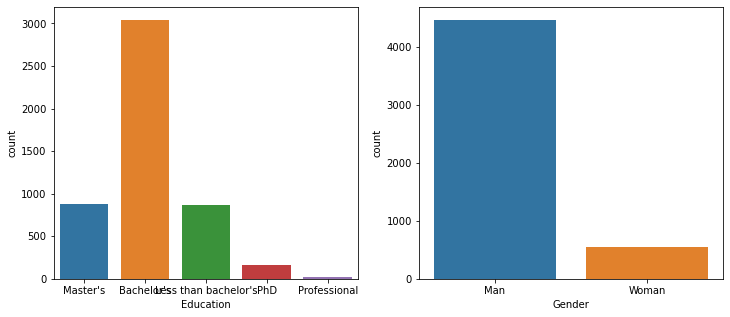

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=dataSO.Education, ax=ax1)
sns.countplot(x=dataSO.Gender, ax=ax2);

<AxesSubplot:xlabel='Education', ylabel='count'>

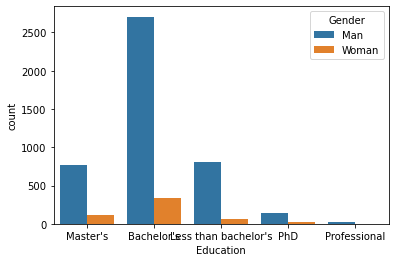

In [45]:
sns.countplot(x=dataSO.Education, hue=dataSO.Gender)

In [46]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [47]:
tips.groupby(["day"]).mean()#['tip']

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


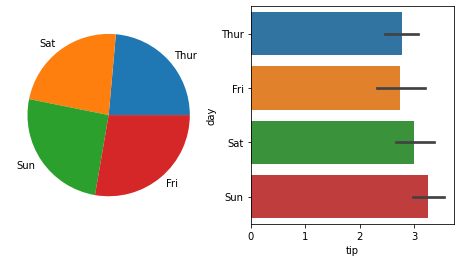

In [48]:
daysVals = set(tips.day)
tipsVals = list( tips.groupby(["day"]).mean()['tip'] )

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.pie(tipsVals, labels=daysVals)
sns.barplot(x=tips.tip, y=tips.day, ax=ax2);

<AxesSubplot:xlabel='day', ylabel='count'>

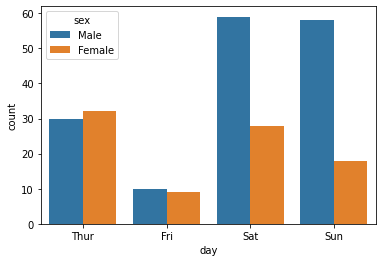

In [49]:
sns.countplot(x=tips.day, hue=tips.sex)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Thur'), Text(1, 0, 'Fri'), Text(2, 0, 'Sat'), Text(3, 0, 'Sun')])

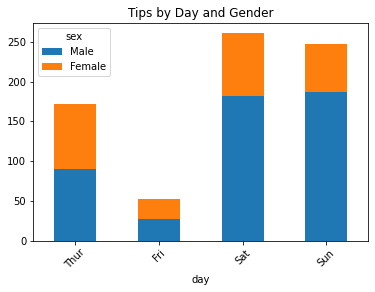

In [50]:
agg_tips = tips.groupby(['day', 'sex'])['tip'].sum().unstack().fillna(0)

# Very simple one-liner using our agg_tips DataFrame.
agg_tips.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Tips by Day and Gender')
plt.xticks(rotation=45, ha='center')

## Another case

You are woking now with neuroscientists! They have a dataset `dots` where they measure how how neurons spike. They measure the firing rate of some neurons in two treatments (called `choices` in the columns).

In [52]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [53]:
dots.groupby(['align', 'choice']).size()

align  choice
dots   T1        194
       T2        200
sacc   T1        224
       T2        230
dtype: int64

The way you plot the data, even if it's very similar, can lead to some misunderstandings.

<AxesSubplot:xlabel='firing_rate', ylabel='Density'>

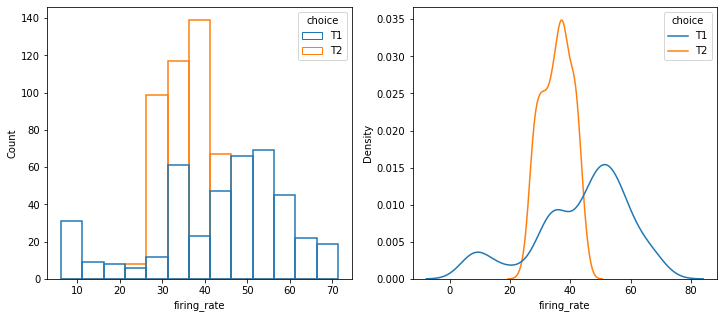

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(x=dots.firing_rate, hue=dots.choice, binwidth=5, fill=False, ax=ax1)
sns.kdeplot(x=dots.firing_rate, hue=dots.choice, ax=ax2)

## The importance of visualizing your data or _The Datasaurus dataset_

In [55]:
import pandas as pd

In [56]:
trex = pd.read_csv('../data/DatasaurusDozen.tsv', sep='\t')

In [57]:
names = list( set(trex.dataset) )
names

['circle',
 'star',
 'wide_lines',
 'high_lines',
 'away',
 'dino',
 'v_lines',
 'slant_up',
 'bullseye',
 'h_lines',
 'x_shape',
 'slant_down',
 'dots']

In [58]:
def obtainInfo(data, names):
    for name in names:
        vals = data[data.dataset == name]
        media = vals.mean()
        std = vals.std()
        print("\nDataset: {}".format(name))
        print("Media: {:.3g}".format(media[0]))
        print("Desviación estándar: {:.3g}".format(std[0]))
        
obtainInfo(trex, names)


Dataset: circle
Media: 54.3
Desviación estándar: 16.8

Dataset: star
Media: 54.3
Desviación estándar: 16.8

Dataset: wide_lines
Media: 54.3
Desviación estándar: 16.8

Dataset: high_lines
Media: 54.3
Desviación estándar: 16.8

Dataset: away
Media: 54.3
Desviación estándar: 16.8

Dataset: dino
Media: 54.3
Desviación estándar: 16.8

Dataset: v_lines
Media: 54.3
Desviación estándar: 16.8

Dataset: slant_up
Media: 54.3
Desviación estándar: 16.8

Dataset: bullseye
Media: 54.3
Desviación estándar: 16.8

Dataset: h_lines
Media: 54.3
Desviación estándar: 16.8

Dataset: x_shape
Media: 54.3
Desviación estándar: 16.8

Dataset: slant_down
Media: 54.3
Desviación estándar: 16.8

Dataset: dots
Media: 54.3
Desviación estándar: 16.8


All of them have the same mean and standard deviation! So they must be the same or pretty similar, no?

Let's plot them:

<AxesSubplot:xlabel='x', ylabel='y'>

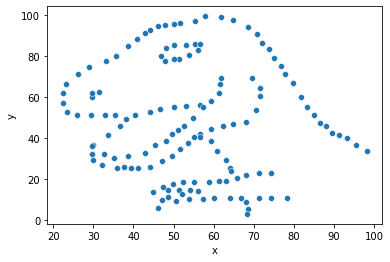

In [59]:
sns.scatterplot(x=trex[trex.dataset == 'dino'].x,
                y=trex[trex.dataset == 'dino'].y)

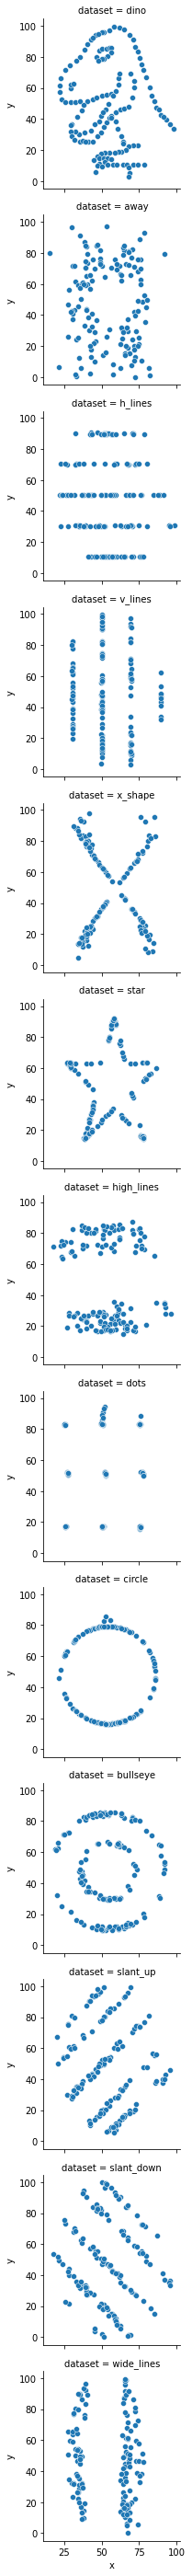

In [60]:
g = sns.FacetGrid(data=trex, row="dataset")
g.map(sns.scatterplot, "x", "y")

<IPython.core.display.Javascript object>


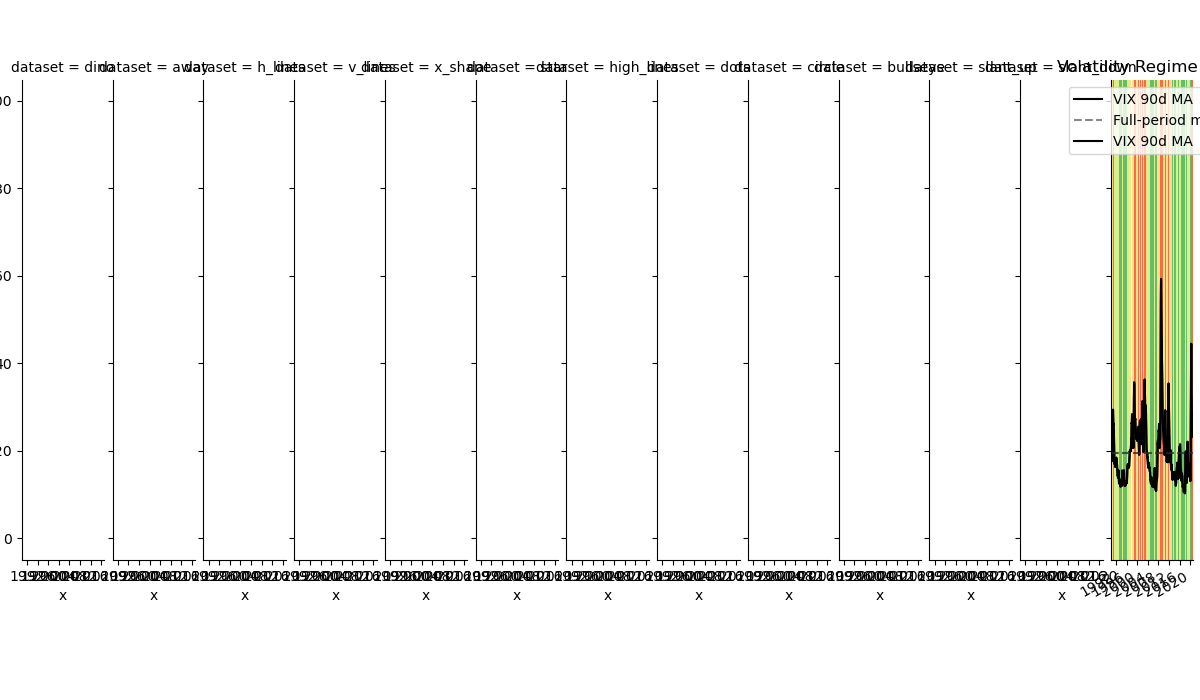

In [63]:
%matplotlib notebook
sns.FacetGrid(data=trex, col="dataset").map(sns.scatterplot, "x", "y")

In [66]:
%matplotlib inline

# Further reading

The [Datasaurus](https://blog.revolutionanalytics.com/2017/05/the-datasaurus-dozen.html) dataset.

Books: [Storytelling with data](https://www.storytellingwithdata.com/books).

If you don't want to read, there's a talk from the author of those two books [here](https://www.youtube.com/watch?v=8EMW7io4rSI&t=1557s).

This [book](https://www.amazon.com/Data-Points-Visualization-Means-Something-ebook/dp/B00C2WKEFK) is also interesting.

## Try it on your own!

Try to follow the code below to construct a complex figure using just matplotlib. Call the documentation when you don't know what an argument does. It's OK if you didn't know how to draw this figure from scratch (you will be able to do it!), but you need to understand what's happening in the code.

If you have invested money on some kind of asset, you might have seen the type of plot this code draws.

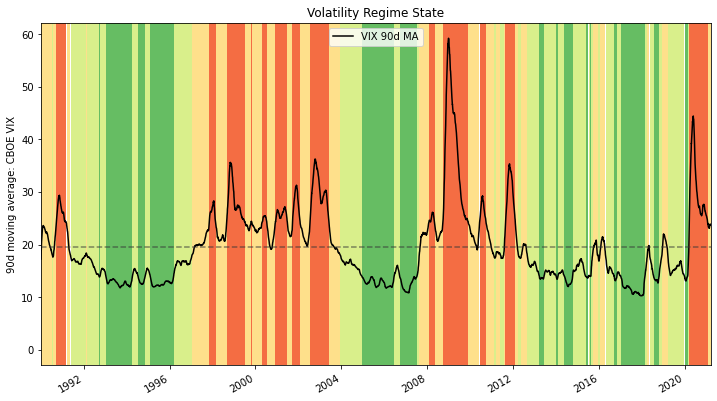

In [67]:
# First, we need some data!

# The data is from the Chicago Board Options Exchange's CBOE Volatility Index 
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
# If you have problems downloading this (503 error),
# you can copy-paste the url in a web-broser tab, open it,
# and save the page as a csv file to load it in pandas.

# We are going to use pandas to get the data and create a nice dataframe.
#
# We set the column 0 as the *index*,
# *parse* the dates (i.e., that pandas knows those are dates),
# the NA values are *transformed* into points (and later dropped, if any)
# and if the data is just one column, pandas *squeezes* it into a Series object
vix = pd.read_csv(url, index_col=0, parse_dates=True,
                  na_values='.', infer_datetime_format=True,
                  squeeze=True).dropna()

# The function `rolling`, for each point slices the data into sections of the previous (in this case) 90 days
# and then we compute the mean of those values. That's the `ma` variable, and sometimes it's called
# moving average
ma = vix.rolling('90d').mean()

# If we want to segment/cut out data into "sections", we can use the function pandas.cut
# Asigns a *label* to the values of *ma* that fall into the *bins* that we define:
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4))

# This is to obtain a colormap to use it later
cmap = plt.get_cmap('RdYlGn_r')

# Now we want to plot the `ma` variable.
# We can use the function .plot directly on ma (because ma is a pandas object)
ma.plot(color='black', linewidth=1.5, marker='', figsize=(12, 7), label='VIX 90d MA')

# Because we created a figure directly (like calling plt.plot),
# we need the *axes* if we want to modify it.
# To Get the Current Axes (that ma.plot() references), call plt.gca() function.
ax = plt.gca()
# It's not a very good practice, it's better to use plt.subplots(),
# but some "old" code uses it.

# Now we can change properties from our axes.
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

# Import a module from a package to help us
import matplotlib.transforms as mtransforms

# Remember how we cut our data into several sections/slices earlier?
# We can use it to color certain areas in the plot
# (green if the data grows, yellow if stays the same, red if the data decreases)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=(state==i),
                    facecolor=color, transform=trans)

# This just plots a dashed horizontal line that represents the mean value overall
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')